In [81]:
# import libraries and csv files

import pandas as pd
import numpy as np

train_data= pd.read_csv("train.csv")
test_data= pd.read_csv("test.csv")
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
#Preprocessing

#count of missing value
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [83]:
#fill missing values of Age columns with median values
train_data['Age'].fillna(train_data['Age'].median(), inplace =True)
test_data["Age"].fillna(test_data["Age"].median(), inplace =True)

In [84]:
#fill Embarked column with mod
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [85]:
#fill Fare missing value with median value
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [86]:
#most of Cabin values are missing. so we should delete column from dataset
train_data.drop(columns = ['Cabin'], inplace = True)
test_data.drop(columns = ['Cabin'], inplace = True)

In [87]:
# Kategorik verileri sayısal değerlere dönüştürme
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)


In [88]:
# Yeni özellikler oluşturma
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Gereksiz sütunları kaldırma
train_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
test_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


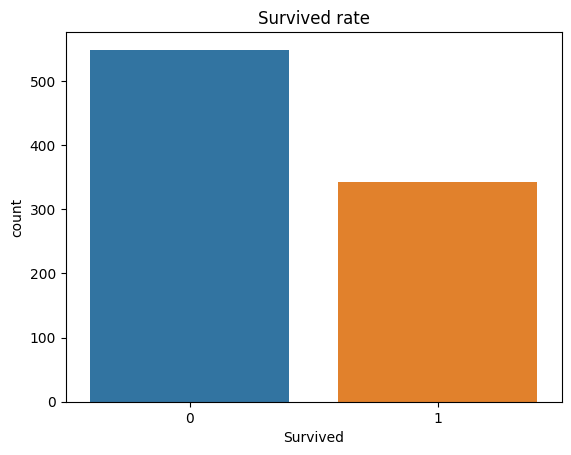

In [89]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#survived according to gender
sns.countplot(x = 'Survived', data = train_data)
plt.title('Survived rate')
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


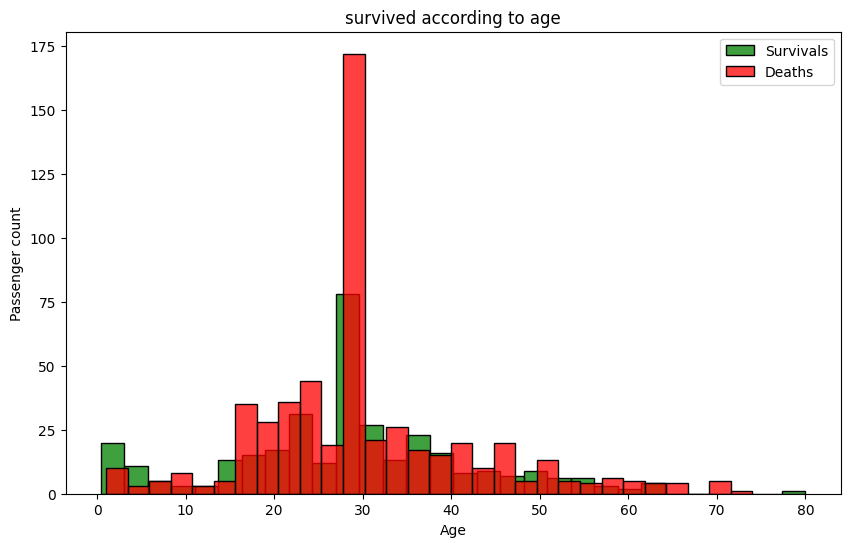

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(train_data[train_data["Survived"]== 1]["Age"],bins= 30, kde=False, color="green", label= "Survivals")
sns.histplot(train_data[train_data["Survived"]== 0]["Age"],bins= 30, kde=False, color="red", label= "Deaths")
plt.title("survived according to age")
plt.xlabel("Age")
plt.ylabel("Passenger count")
plt.legend()
plt.show()

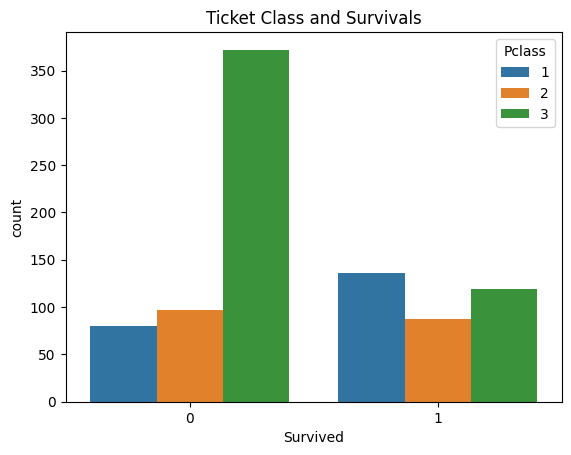

In [91]:
#ticket class and survivals
sns.countplot(x='Survived', hue = "Pclass", data=train_data)
plt.title('Ticket Class and Survivals')
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


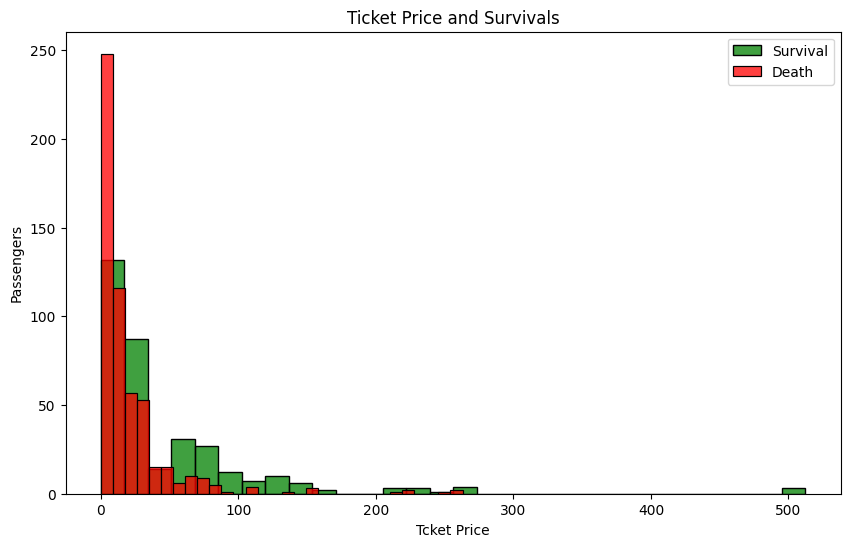

In [92]:
#Ticket Price and Survivals

plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Fare'], bins=30, kde=False, color='green', label='Survival')
sns.histplot(train_data[train_data['Survived'] == 0]['Fare'], bins=30, kde=False, color='red', label='Death')
plt.title('Ticket Price and Survivals')
plt.xlabel('Tcket Price')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [93]:
# Modelling


In [101]:
#logical regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

#split train and test data 
X = train_data.drop(columns = ['Survived'])
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state = 42)

#Model Training
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(X_train, y_train)

#Predict
y_pred= log_reg.predict(X_val)

#Evulate Model 
print(f"Logical Regression Accuarcy: {accuracy_score(y_val, y_pred)}")


Logical Regression Accuarcy: 0.8100558659217877


In [102]:
# @Decision tree

from sklearn.tree import DecisionTreeClassifier

# Modeli eğitme
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Tahmin yapma
y_pred = decision_tree.predict(X_val)

# Modeli değerlendirme
print(f'Decision Tree Accuracy: {accuracy_score(y_val, y_pred)}')


Decision Tree Accuracy: 0.7821229050279329


In [105]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Modeli eğitme
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Tahmin yapma
y_pred = random_forest.predict(X_val)

# Modeli değerlendirme
print(f'Random Forest Accuracy: {accuracy_score(y_val, y_pred)}')



Random Forest Accuracy: 0.8212290502793296


In [106]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

# Modeli eğitme
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Tahmin yapma
y_pred = knn.predict(X_val)

# Modeli değerlendirme
print(f' KNN Accuracy: {accuracy_score(y_val, y_pred)}')
 


 KNN Accuracy: 0.6983240223463687


In [108]:
from sklearn.svm import SVC

# Modeli eğitme
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Tahmin yapma
y_pred = svm.predict(X_val)

# Modeli değerlendirme
print(f'SVM Accuracy: {accuracy_score(y_val, y_pred)}')


SVM Accuracy: 0.7821229050279329


In [110]:
#Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(f'Best Score: {grid_search.best_score_}')



Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8300305328474342
